# **1**. Project Topic
This dataset contains the latest information on car prices in Australia for the year 2023. It covers various brands, models, types, and features of cars sold in the Australian market. It provides useful insights into the trends and factors influencing the car prices in Australia.

We will predict the price. Therefore, we will use regression to solve the problem.


# **2**. Data

The dataset includes information such as brand, year, model, car/suv, title, used/new, transmission, engine, drive type, fuel type, fuel consumption, kilometres, colour (exterior/interior), location, cylinders in engine, body type, doors, seats, and price. The dataset has over 16,000 records of car listings from various online platforms in Australia.

---
**Reference:**  
Nelgiriyewithana. (2023). *Australian Vehicle Prices* [Data set]. Kaggle. https://www.kaggle.com/datasets/nelgiriyewithana/australian-vehicle-prices



In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import GridSearchCV


## 2.1 Fectch the data

In [2]:
df = pd.read_csv("Australian Vehicle Prices.csv")

## 2.2 EDA

### *2.2.1 Understand the features and their values*

In [3]:
df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


#### 2.2.1.1 The Shape of the dataset

---
* The 'Brand' is a non-ordinal categorical feature. Therefore, it should be encoded using **one-hot encoding**.
* The 'Year' has the float type, which makes no sense. And, the number of year does not matter but only the difference between now and the 'year'. Therefore, we will use **label encoding** to convert it.
* The 'Model', 'Title', 'Transmission', 'DirveType', ColourExtInt', 'Location', BodyType and 'Car/Suv' are just like the 'Brand', we will use **one-hot encoding**.
* The 'UsedOrNew','Engine' are like the 'Year' and need to be converted into non-ordinal data type using **label enconding**. Some of their orders should be specified and convert manually.
* The rest featues are object, but suppsoed to be numeric, we will deal with before feed them into the model.

In [4]:
print(f"Dataset contains {df.shape[0]} rows (samples) and {df.shape[1]} columns (features).")

Dataset contains 16734 rows (samples) and 19 columns (features).


#### 2.2.1.2 Features and Data Type

In [5]:
print("Columns and their data types:")
print(df.dtypes,'\n')
print("The data types' count:")
print(df.dtypes.value_counts())

Columns and their data types:
Brand                 object
Year                 float64
Model                 object
Car/Suv               object
Title                 object
UsedOrNew             object
Transmission          object
Engine                object
DriveType             object
FuelType              object
FuelConsumption       object
Kilometres            object
ColourExtInt          object
Location              object
CylindersinEngine     object
BodyType              object
Doors                 object
Seats                 object
Price                 object
dtype: object 

The data types' count:
object     18
float64     1
Name: count, dtype: int64


---
* As we see, the data type are not suitable for further analysis, we need to deal with it first.

### 2.2.2 *Data Overview & Cleanning*


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16733 non-null  object 
 1   Year               16733 non-null  float64
 2   Model              16733 non-null  object 
 3   Car/Suv            16706 non-null  object 
 4   Title              16733 non-null  object 
 5   UsedOrNew          16733 non-null  object 
 6   Transmission       16733 non-null  object 
 7   Engine             16733 non-null  object 
 8   DriveType          16733 non-null  object 
 9   FuelType           16733 non-null  object 
 10  FuelConsumption    16733 non-null  object 
 11  Kilometres         16733 non-null  object 
 12  ColourExtInt       16733 non-null  object 
 13  Location           16284 non-null  object 
 14  CylindersinEngine  16733 non-null  object 
 15  BodyType           16452 non-null  object 
 16  Doors              151

---
* Most features are object type, we may convert them into the proper ones.
* The Price is also object type.

#### 2.2.3.1 Deal with the null/nil values


* **Check whether any values are missing and calculate the null value ratio**


In [7]:
# For each column, calculate the percentage of missing (null) values
null_ratio = df.isnull().mean().sort_values(ascending=False)

# Display as a percentage
null_ratio_percent = null_ratio * 100

# Show only columns with missing data
print(null_ratio_percent[null_ratio_percent > 0])


Seats                10.188837
Doors                 9.585275
Location              2.689136
BodyType              1.685192
Car/Suv               0.167324
Price                 0.017928
Brand                 0.005976
Model                 0.005976
Year                  0.005976
UsedOrNew             0.005976
Title                 0.005976
FuelConsumption       0.005976
FuelType              0.005976
DriveType             0.005976
Engine                0.005976
Transmission          0.005976
CylindersinEngine     0.005976
Kilometres            0.005976
ColourExtInt          0.005976
dtype: float64


---
* All featurues and the target(price) are all missing values. Wee need to look into them to reach a suitable solution.
* Considering we have more than 16K data rows, after removing 10% data, we still have enough data to train. Therefore, we just remove all the null values for our convienece.

* **Remove all null data**

In [8]:
# Remove null values and check the shape of dataset again
df.dropna(inplace=True)
print(f"Dataset contains {df.shape[0]} rows (samples) and {df.shape[1]} columns (features).")

Dataset contains 14586 rows (samples) and 19 columns (features).


---
* We still have 14586 rows that are plenty for the training.

#### 2.2.3.2 Feature selection & Convert categorical columns

* **The ordinals**

In [9]:
df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


In [10]:
df_encoded = df.copy()
ord_cols = ['Year','UsedOrNew']
le = LabelEncoder()
for col in ord_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

* **The nominals**
* The 'Title is redundant with 'Year', 'Brand',  and 'Model', so we drop it.
* The 'location' includes both city and state. Generally, car prices within the same state cannot be dramatically different, so considering only the state is usually sufficient.
* The 'Model' indicates the 'BodyType', 'Engine', 'CylindersinEngine' and other features of a car, so the 'Model' is redundant with others.

In [11]:
# Drop the 'Title' column as it is not needed for the analysis.
df_encoded.drop(columns=['Title','Model'], inplace=True)

In [12]:
# Seperate the state from the 'Location' column
df_encoded['State'] = df_encoded['Location'].str.split(',').str[1].str.strip()
# Drop the 'Location' column as it is not needed for the analysis.
df_encoded.drop(columns=['Location'], inplace=True)
# Convert 'State' column to categorical type
df_encoded['State'] = df_encoded['State'].astype('category')

In [14]:
nominal_cols = ['Brand', 'BodyType', 'Car/Suv','Transmission', 'FuelType', 'DriveType','ColourExtInt','State']
df_dummies = pd.get_dummies(df_encoded[nominal_cols], drop_first=True)
df_encoded = df_encoded.drop(nominal_cols, axis=1)
df_encoded = pd.concat([df_encoded, df_dummies], axis=1)


* **Univarite Analysis for the rest features and Target & ** <br>
 -- Before we move forward to the rest features, let's we carefully examine the features and target.<br>
 -- The rest features are more complicated than the encoded ones. We may conver them in a more comlicated way or manully.

* The Price - our target

In [15]:
# Convert the 'Price' column to numeric, forcing errors to NaN
df_encoded['Price'] = pd.to_numeric(df_encoded['Price'], errors='coerce')
# Remove rows with NaN in 'Price' after conversion
df_encoded.dropna(subset=['Price'], inplace=True)

In [16]:
df_encoded['Price'].describe()

count     14551.000000
mean      34980.246306
std       29031.113506
min          88.000000
25%       18990.000000
50%       28990.000000
75%       42755.000000
max      649880.000000
Name: Price, dtype: float64

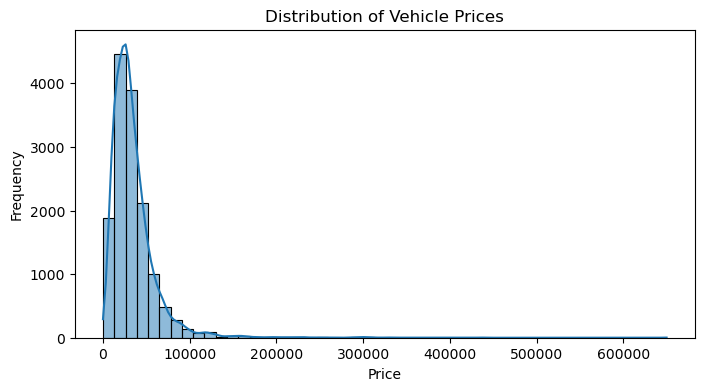

In [17]:
# Plotting the distribution of the 'Price' column
plt.figure(figsize=(8, 4))
sns.histplot(df_encoded['Price'], bins=50, kde=True)
plt.title('Distribution of Vehicle Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

* The fuel consumption and Cylinders in Engine <br>
-- Intuitively, the number of cylinders in an engine influences fuel consumption: The more cylinders a car has, the more fuel it consumes.(0 fuel consumption means it is a electric car.)<br>
-- So, we can just drop the fuel consumption column.

In [18]:
df_encoded.drop(columns=['FuelConsumption'], inplace=True)

* CylindersinEngine, Seats and Doors <br>

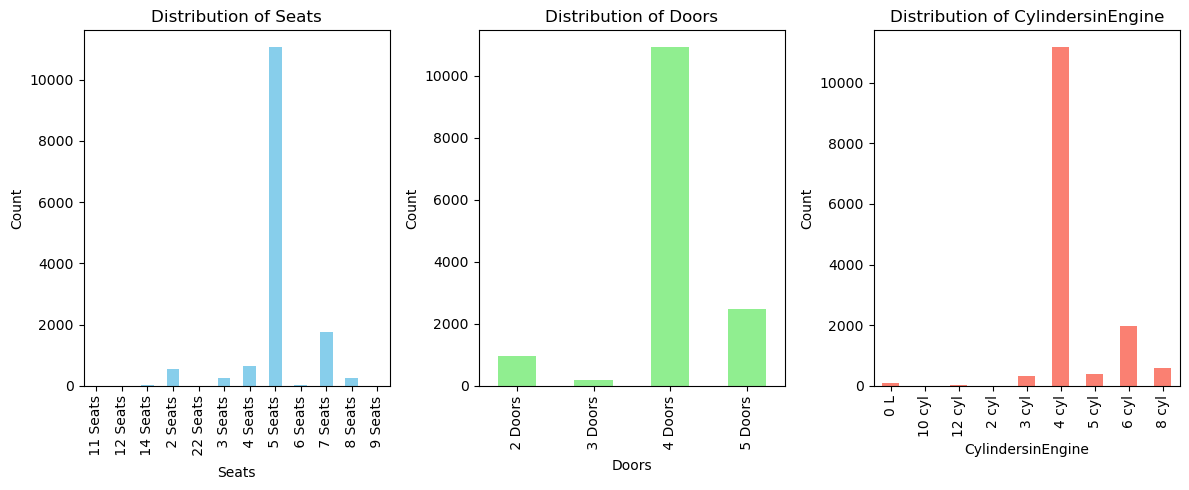

In [19]:
# First, we plot the distributions

# Create a figure with 1 row and 2 columns of subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 5))  # figsize controls overall figure size

# Plot 'Seats' distribution
df_encoded['Seats'].value_counts().sort_index().plot(
    kind='bar', ax=axs[0], title='Distribution of Seats', color='skyblue'
)
axs[0].set_xlabel('Seats')
axs[0].set_ylabel('Count')

# Plot 'Doors' distribution
df_encoded['Doors'].value_counts().sort_index().plot(
    kind='bar', ax=axs[1], title='Distribution of Doors', color='lightgreen'
)
axs[1].set_xlabel('Doors')
axs[1].set_ylabel('Count')

# Plot 'CylindersinEngine' distribution
df_encoded['CylindersinEngine'].value_counts().sort_index().plot(
    kind='bar', ax=axs[2], title='Distribution of CylindersinEngine', color='salmon'
)
axs[2].set_xlabel('CylindersinEngine')
axs[2].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

* We can simply conver these features' values to the numeric values by applying split function.

In [20]:
def conv2num_helper(feature):
    df_encoded[feature] = df_encoded[feature].str.split().str[0].astype(int)
    print(f"Converted {feature} to numeric values.")
    print(set(df_encoded[feature]))

for f in ['Seats', 'Doors', 'CylindersinEngine']:
    conv2num_helper(f)

Converted Seats to numeric values.
{2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 22}
Converted Doors to numeric values.
{2, 3, 4, 5}
Converted CylindersinEngine to numeric values.
{0, 2, 3, 4, 5, 6, 8, 10, 12}


* The 'Engine' <br>
-- It's safe to say it's partially redundant with 'CylindersinEngine', let's fix it.

In [21]:
# Make sure it's all string for regex
df_encoded['Engine'] = df_encoded['Engine'].astype(str)

# Remove rows like '4 cyl' (no engine size)
df_encoded = df_encoded[~df_encoded['Engine'].str.fullmatch(r'\d+ cyl', na=False)]

# Replace '0 L' with '0.0 L' so it's still parseable
df_encoded['Engine'] = df_encoded['Engine'].replace('0 L', '0.0 L')

# Extract ONLY the number before the "L"
df_encoded['Engine'] = df_encoded['Engine'].str.extract(r'(\d+(\.\d+)?)\s*L')[0].astype(float)


print(set(df_encoded['Engine']))

{0.0, 1.5, 2.2, 2.0, 1.3, 5.5, 1.6, 2.7, 3.0, 1.4, 1.0, 2.4, 2.5, 4.0, 6.0, 6.6, 3.5, 4.1, 4.5, 4.4, 4.6, 4.9, 5.0, 5.4, 5.6, 5.9, 6.4, 6.1, 6.5, 2.1, 2.6, 3.6, 3.1, 0.7, 1.2, 1.7, 2.3, 2.8, 3.2, 3.8, 3.3, 3.7, 4.8, 1.8, 4.2, 4.7, 4.3, 5.7, 5.3, 5.2, 6.2, 6.8, 6.3, 7.3, 1.9, 0.9, 2.9, 3.4, 3.9}


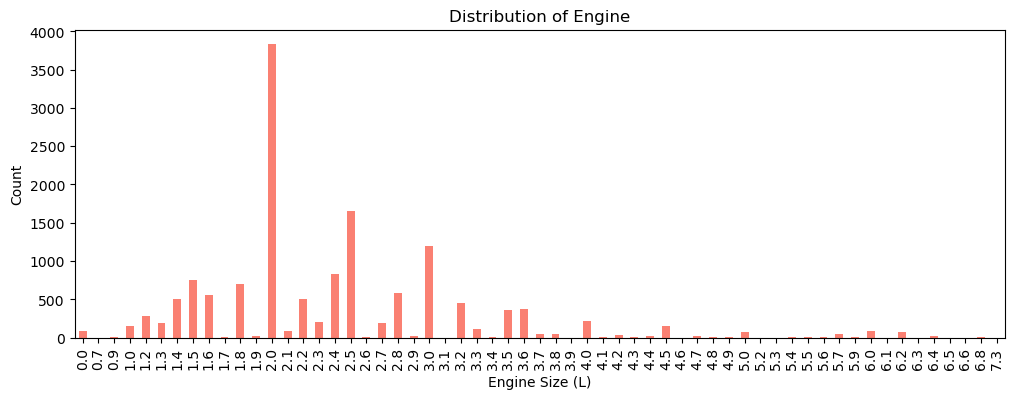

In [22]:
# Let's plot the distribution of 'Engine'
plt.figure(figsize=(12, 4))
df_encoded['Engine'].value_counts().sort_index().plot(
    kind='bar', title='Distribution of Engine', color='salmon'
)
plt.xlabel('Engine Size (L)')
plt.ylabel('Count')
plt.show()

* The 'Kilometers' - conver it to numeric values

In [23]:
df_encoded['Kilometres'] = pd.to_numeric(df_encoded['Kilometres'], errors='coerce')

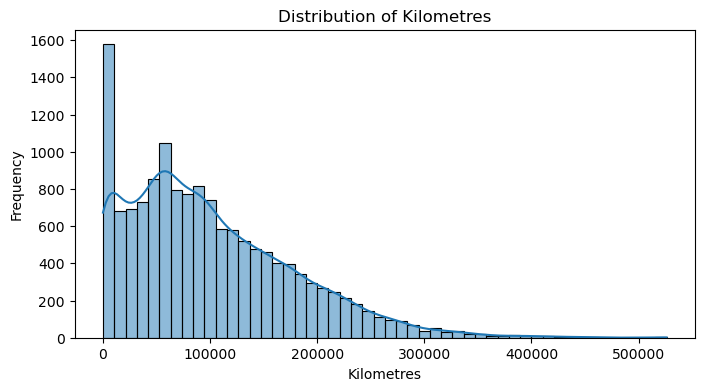

In [24]:
# Plot the distribution of 'Kilometres'
plt.figure(figsize=(8, 4))
sns.histplot(df_encoded['Kilometres'], bins=50, kde=True)
plt.title('Distribution of Kilometres')
plt.xlabel('Kilometres')
plt.ylabel('Frequency')
plt.show()

In [25]:
# Check whether there are any remaining null values in the dataset
print(f'No null values') if df.isnull().sum()[df.isnull().sum() > 0].empty else print(f'Null values found: {df.isnull().sum()[df.isnull().sum() > 0]}')

non_numeric_cols = df_encoded.select_dtypes(exclude=['number','bool']).columns
print(f'No numeric columns') if non_numeric_cols.empty else print(f'Non-numeric columns found: {non_numeric_cols}') 

No null values
No numeric columns


## 2.3 Final data preparations before modelling

### 2.3.1 *Normalization*

In [26]:
df_encoded.dropna(inplace=True)  # Ensure no NaN values remain

X = df_encoded.drop('Price', axis=1)  # all columns except 'Price'
y = df_encoded['Price']               # target column


# Step 1: Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 2: Initialize the scaler
scaler = StandardScaler()

# Step 3: Fit the scaler on training data and transform training data
X_train_scaled = scaler.fit_transform(X_train)

# Step 4: Transform test data using the same scaler (no fitting)
X_test_scaled = scaler.transform(X_test)

### *2.3.2 PCA*
-- After several attempts, PCA does not help in this case. So, we just use original data to train.

In [27]:

## 1. Standardize the features (important before PCA)
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X_train)  # Use training features
#
## 2. Initialize PCA, choose number of components or variance to keep
#pca = PCA(n_components=0.95)  # Keep 95% variance; or use an integer n_components=10 for example
#
## 3. Fit PCA on training data and transform it
#X_train_pca = pca.fit_transform(X_scaled)
#
## 4. Also transform the test set using the same scaler and PCA
#X_test_scaled = scaler.transform(X_test)
#X_test_pca = pca.transform(X_test_scaled)
#
## Now you can use X_train_pca and X_test_pca to train and test your model


# **3 Modelling**

## 3.1 Model selection

In [28]:
models_and_params = {
    'RandomForest': {
        'model': RandomForestRegressor(random_state=42, n_jobs=-1),
        'params': {'n_estimators': [50, 100], 'max_depth': [None, 10, 20]}
    },
    'XGBoost': {
        'model': XGBRegressor(random_state=42, n_jobs=-1),
        'params': {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1]}
    }
}

best_models = {}

for name, mp in models_and_params.items():
    print(f"Tuning {name}...")
    grid = GridSearchCV(mp['model'], mp['params'],
                        scoring='neg_root_mean_squared_error',
                        cv=5, n_jobs=-1)
    grid.fit(X_train, y_train)  # Use original data for tree models
    best_models[name] = grid.best_estimator_
    print(f"{name} best RMSE: {-grid.best_score_:.2f}, best params: {grid.best_params_}")


Tuning RandomForest...
RandomForest best RMSE: 11487.30, best params: {'max_depth': None, 'n_estimators': 50}
Tuning XGBoost...
XGBoost best RMSE: 10609.69, best params: {'learning_rate': 0.1, 'n_estimators': 200}


---
* We will use XGBoost to train our data since it has the lower RMSE.

In [29]:
y_pred = best_models['XGBoost'].predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.2f}")
print(f"Test MAE: {mae:.2f}")
print(f"Test R²: {r2:.4f}")

Test RMSE: 13193.94
Test MAE: 5284.35
Test R²: 0.8392


---
* Can we do it better?

## 3.2 Hypermeter tuning

In [30]:
from sklearn.model_selection import RandomizedSearchCV
xgb = XGBRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0]
}

search = RandomizedSearchCV(xgb, param_grid, 
                             scoring='neg_root_mean_squared_error', 
                             cv=5, n_iter=20, n_jobs=-1, random_state=42)
search.fit(X_train, y_train)

print(f"Best RMSE: {-search.best_score_:.2f}")
print(f"Best Params: {search.best_params_}")


Best RMSE: 10288.01
Best Params: {'subsample': 0.9, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 1.0}


In [31]:

# Initialize model with best parameters
xgb_best_model = XGBRegressor(**search.best_params_, random_state=42)

# Train the model
xgb_best_model.fit(X_train, y_train)  

# Make predictions
y_pred = xgb_best_model.predict(X_test)  

# Evaluate predictions
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.2f}")
print(f"Test MAE: {mae:.2f}")
print(f"Test R²: {r2:.4f}")

Test RMSE: 12327.81
Test MAE: 5153.32
Test R²: 0.8597


---
* We slightly improve the result.

## 3.3 What matters

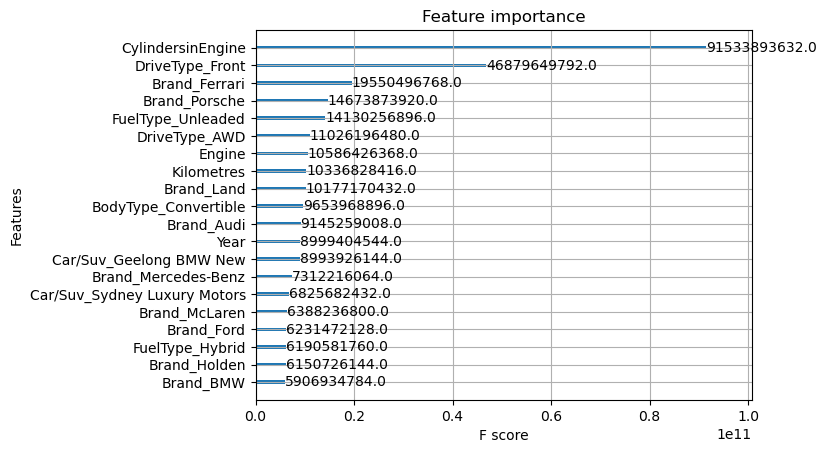

In [32]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Assuming your trained model is named xgb_best_model
plot_importance(xgb_best_model, max_num_features=20, importance_type='gain')
plt.show()


# **4. Interpretation of results**

From what we have learnt from the results above,
1. The model explains about 86% of the variance in the target (the 'Price'), which is a strong fit.
2. MAE is 5153, which means the predicted price are about 5153 off from the actual prices. It's significant for the cars that have average price (about 35K) while not noticable for the luxury cars that have price more than 100K.
3. RMSE is 12328. It's large.
4. The feature importance plot confirms that engine characteristics (CylindersinEngine) and drivetrain (DriveType_Front) are the most critical in predicting the target. Brands like Ferrari, Porsche, and fuel types also heavily influence predictions — consistent with real-world expectations about what drives car value.